<a href="https://colab.research.google.com/github/hammadkhan30/Famrers-Tweet-Analysis-and-Visualization/blob/main/Farmers_tweet_sentiment_prediction_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving farmer5.csv to farmer5.csv


In [ ]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
DATASET_COLUMNS  = ["Tweets","Sentiment"]
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('farmer5.csv',encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

In [ ]:
df.head()

,Tweets,Sentiment
0,b'Explained - The Farm bill 2020 and Why the P...,1
1,b'Pakistani puppet Gurpatwant Singh Pannu agai...,0
2,b'#save #farmers #protest against black bill ....,1
3,b'Good news #SFJ Releases $1Million For \n#Pun...,1
4,"b""@Republic_Bharat Did you know what's happeni...",1


In [ ]:
df['Tweets'].dtypes

dtype('O')

In [ ]:
df.Sentiment.value_counts()

1                                                                                                                                                 327
0                                                                                                                                                  80
 protesting against #FarmersBill but PM Modi did assure them in an advertisement in English Newspape\xe2\x80\xa6'                                   3
 delhi me women activists ko hat\xe2\x80\xa6 https://t.co/9sEMhM7WCS'                                                                               2
 chaired by Prof. M.S. Swaminathan                                                                                                                  2
                                                                                                                                                 ... 
 as part of their protest aga\xe2\x80\xa6 https://t.co/ObqLkAUqXz'                                  

In [ ]:
df['pre_clean_len'] = [len(t) for t in df.Tweets]

In [ ]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.Sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.Tweets.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
pprint(data_dict)

{'dataset_shape': (544, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('O')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


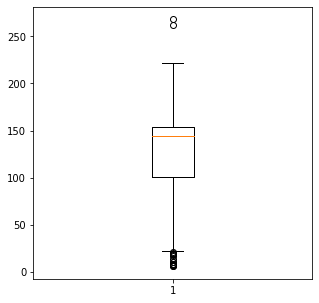

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [ ]:
df[df.pre_clean_len < 150].head(5)

,Tweets,Sentiment,pre_clean_len
2,b'#save #farmers #protest against black bill ....,1,74
8,b'#Farmers bill protest https://t.co/6ta8fYg93o',1,48
9,"b""#Khalistan is the only answer to Indian's An...",1,146
10,b'#Farmers #FarmersBill #AgricultureBills #Bla...,1,138
13,"b""India's anti farmer bill.\nAid of $1Million ...",1,148


In [ ]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
import re
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(Tweets):
    soup = BeautifulSoup(Tweets, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.Tweets[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['b explained the farm bill and why the protests n nthere has been a nation wide uproar ever since the parliamen xe x xa',
 'b pakistani puppet gurpatwant singh pannu again lured money to sikhs under the guise of anti farmer bill protest thi xe x xa',
 'b save farmers protest against black bill i support farmersprotest',
 'b good news sfj releases million for n punjab haryana farmers to nhelp them in their fight against the farmer bil xe x xa',
 'b bharat did you know what s happening in north india due to bill s we can say that farmers are on xe x xa',
 'b ist anti farmer bill azadi hi hul khalistan happily sfj releases million for punjab haryana farmers aid ju xe x xa',
 'b during kissan rally at shambhu boarder referendum ambassador will distribute literature to educate farmers about xe x xa',
 'b due to incompetence and anti farmers bill sikh farmers committed suicide had agricultural land less than acres xe x xa',
 'b farmers bill protest',
 'b khalistan is the only answer to indi

In [ ]:
clean_tweet_texts = []
for i in range(0,544):                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['Tweets'][i]))

In [ ]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [ ]:
clean_tweet_texts2 = []
for i in range(544):
  clean_tweet_texts2.append(tweet_cleaner_updated(clean_tweet_texts[i]))

In [ ]:
clean_tweet_texts2

['explained the farm bill and why the protests nthere has been nation wide uproar ever since the parliamen xe xa',
 'pakistani puppet gurpatwant singh pannu again lured money to sikhs under the guise of anti farmer bill protest thi xe xa',
 'save farmers protest against black bill support farmersprotest',
 'good news sfj releases million for punjab haryana farmers to nhelp them in their fight against the farmer bil xe xa',
 'bharat did you know what happening in north india due to bill we can say that farmers are on xe xa',
 'ist anti farmer bill azadi hi hul khalistan happily sfj releases million for punjab haryana farmers aid ju xe xa',
 'during kissan rally at shambhu boarder referendum ambassador will distribute literature to educate farmers about xe xa',
 'due to incompetence and anti farmers bill sikh farmers committed suicide had agricultural land less than acres xe xa',
 'farmers bill protest',
 'khalistan is the only answer to indian anti farmer bill so support us and make far

In [ ]:
preprocessed = pd.DataFrame(clean_tweet_texts2,columns=['Tweets'])
preprocessed['target'] = df.Sentiment
preprocessed.head()

,Tweets,target
0,explained the farm bill and why the protests n...,1
1,pakistani puppet gurpatwant singh pannu again ...,0
2,save farmers protest against black bill suppor...,1
3,good news sfj releases million for punjab hary...,1
4,bharat did you know what happening in north in...,1


In [ ]:
preprocessed.to_csv('preprocessed.csv',encoding='utf-8')
csv = 'preprocessed.csv'
df = pd.read_csv(csv,index_col=0)
df.head()

,Tweets,target
0,explained the farm bill and why the protests n...,1
1,pakistani puppet gurpatwant singh pannu again ...,0
2,save farmers protest against black bill suppor...,1
3,good news sfj releases million for punjab hary...,1
4,bharat did you know what happening in north in...,1


In [ ]:
df.dtypes

Tweets    object
target    object
dtype: object

In [ ]:
df['Tweets'] = df['Tweets'].astype(str)

In [ ]:
df.dtypes

Tweets    object
target    object
dtype: object

In [ ]:
pd.to_numeric(df['target'], errors='coerce')

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
539    1.0
540    1.0
541    1.0
542    NaN
543    NaN
Name: target, Length: 544, dtype: float64

In [ ]:
df.iloc[df[df.isnull().any(axis=1)].index,:].head()

,Tweets,target


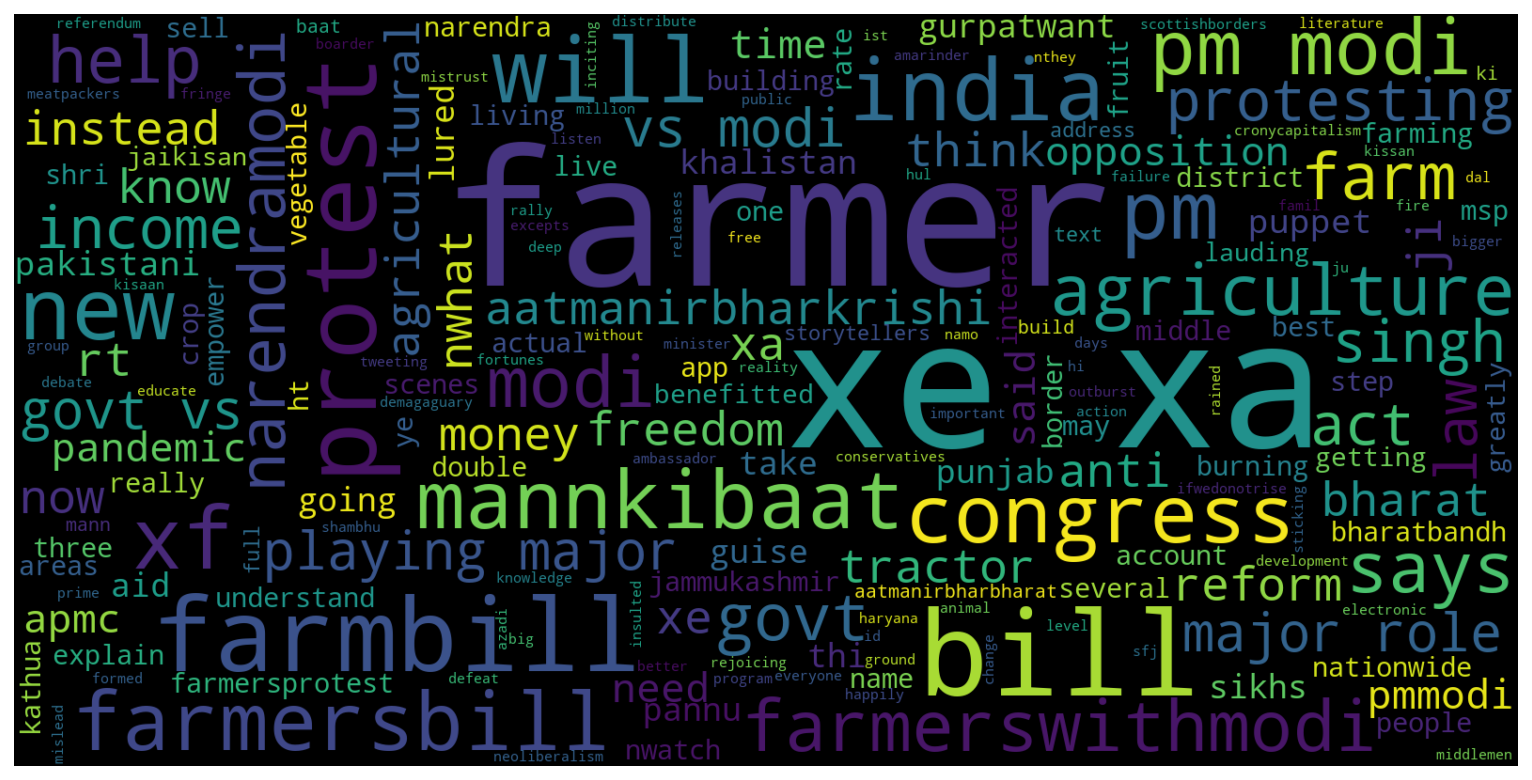

In [ ]:
neg_tweets = df[df.target == '0']
neg_string = []
for t in neg_tweets.Tweets:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

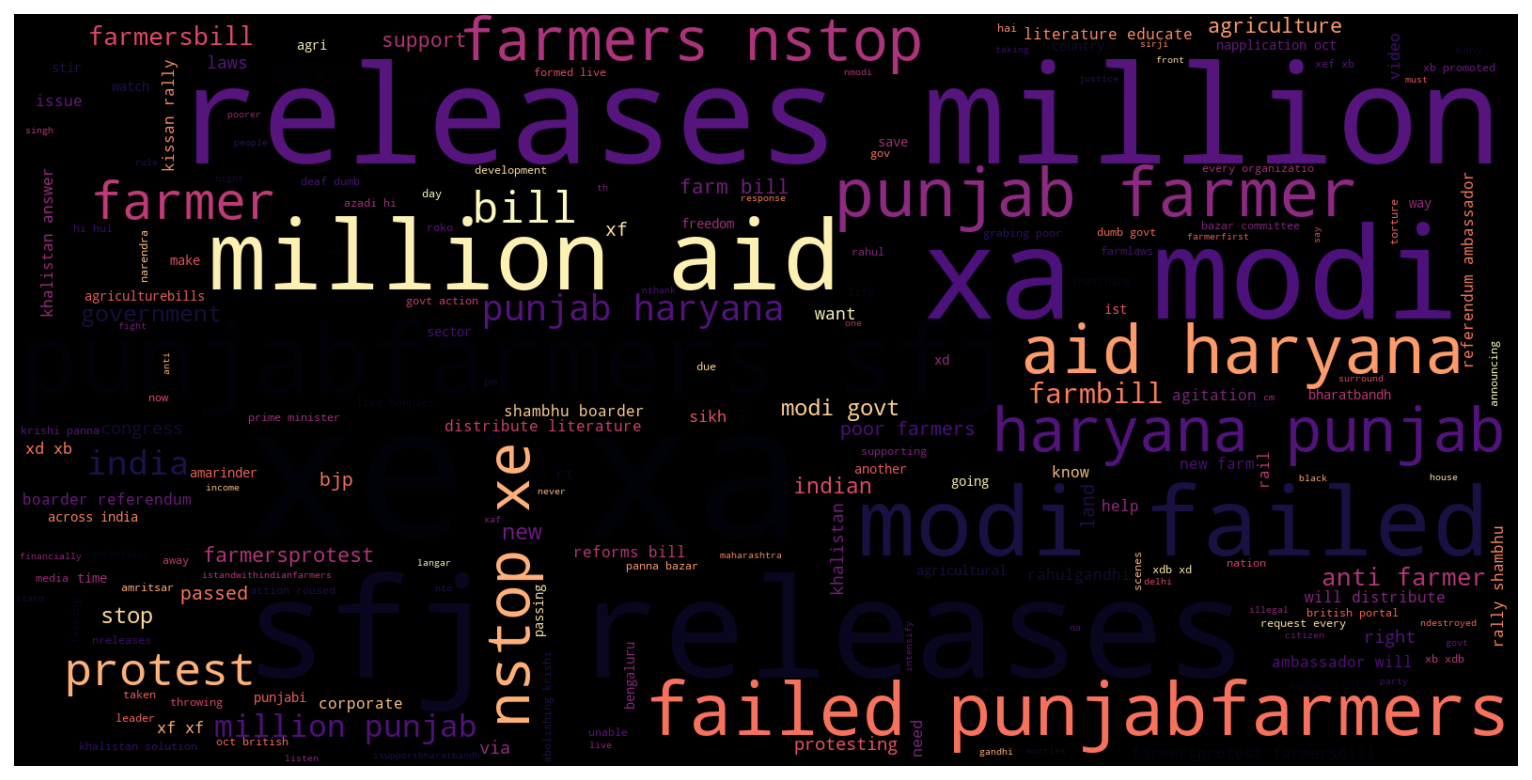

In [ ]:
pos_tweets = df[df.target == '1']
pos_string = []
for t in pos_tweets.Tweets:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(df.Tweets)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
len(cvec.get_feature_names())

1522

In [ ]:
neg_doc_matrix = cvec.transform(df[df.target == 0].Tweets)
pos_doc_matrix = cvec.transform(df[df.target == 1].Tweets)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [ ]:
document_matrix = cvec.transform(df.Tweets)
df[df.target == 0].tail()

,Tweets,target


In [ ]:
neg_batches = np.linspace(0,380,10).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
        print (neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

42 entries' term freuquency calculated
380 entries' term freuquency calculated


In [ ]:
pos_batches = np.linspace(380,555,10).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print (pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

399 entries' term freuquency calculated
555 entries' term freuquency calculated


In [ ]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

,0,1
aatmanirbhar,0,4
aatmanirbharbharat,0,2
aatmanirbharkrishi,1,2
abhisaar,1,0
able,1,0


In [ ]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
xe,302,132,434
farmers,301,119,420
xa,264,110,374
modi,119,111,230
for,127,60,187
the,135,43,178
punjab,132,46,178
sfj,121,47,168
million,109,46,155
haryana,104,44,148


Text(0.5, 1.0, 'Top 50 tokens in tweets')

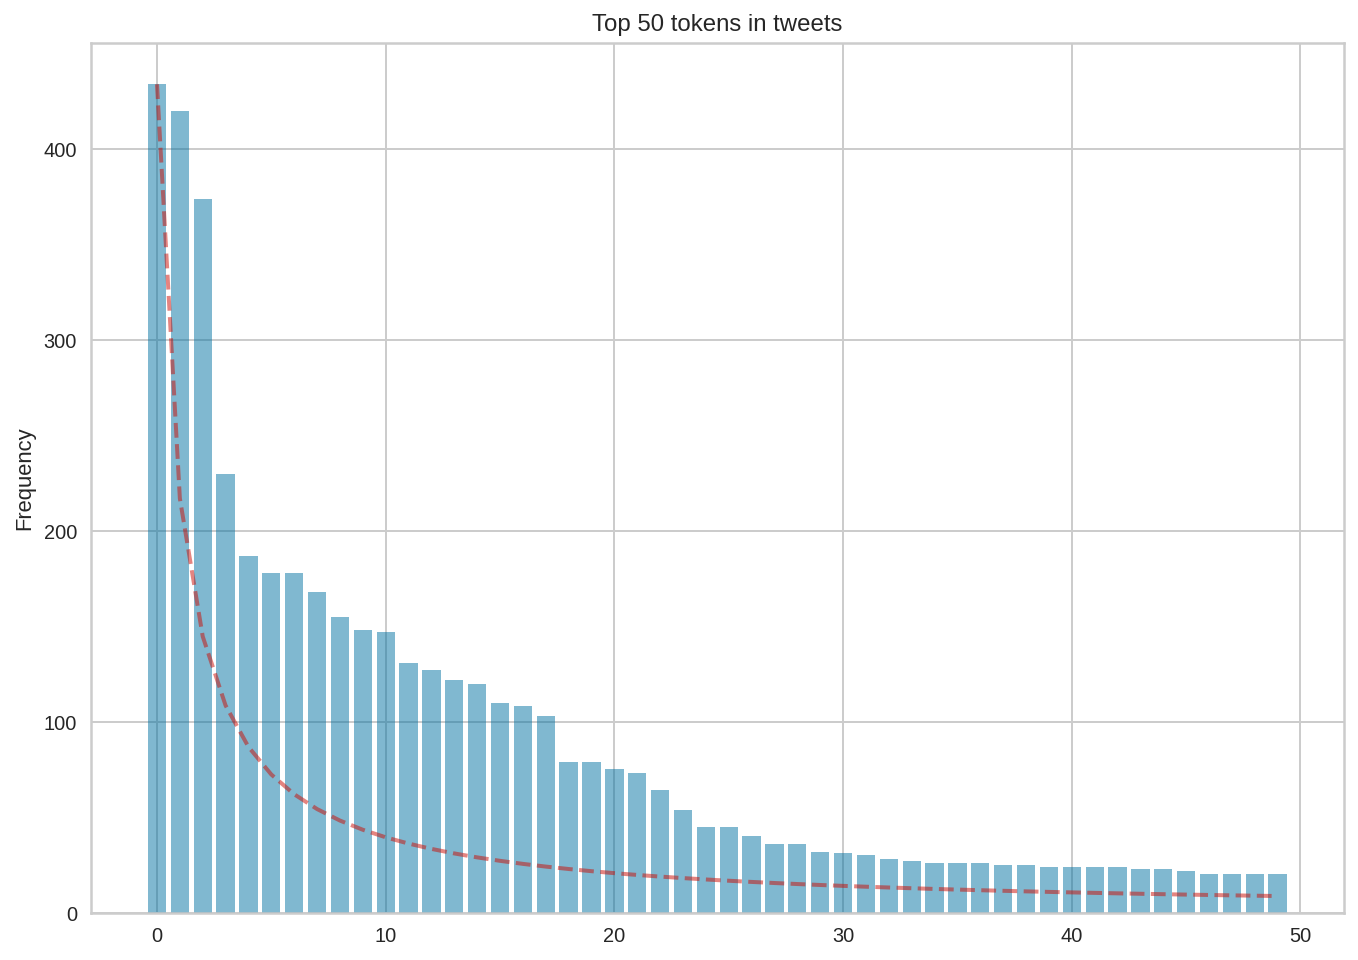

In [ ]:
y_pos = np.arange(50)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:50], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 50 tokens in tweets')

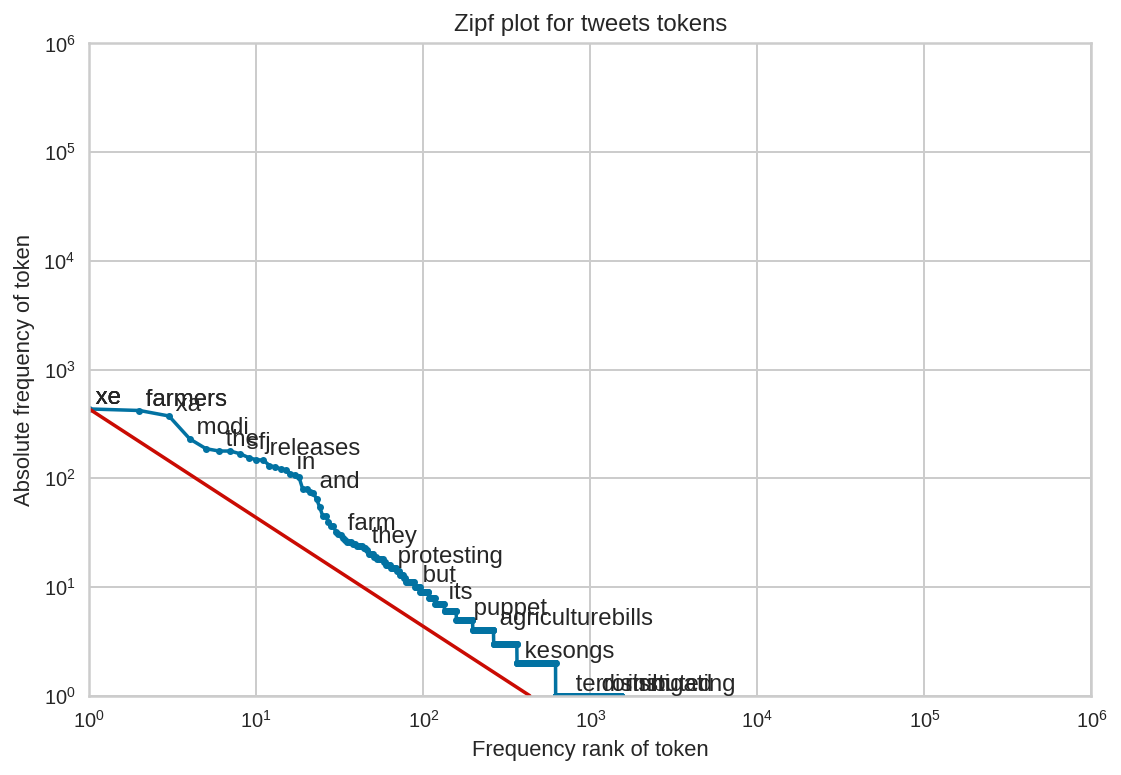

In [ ]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

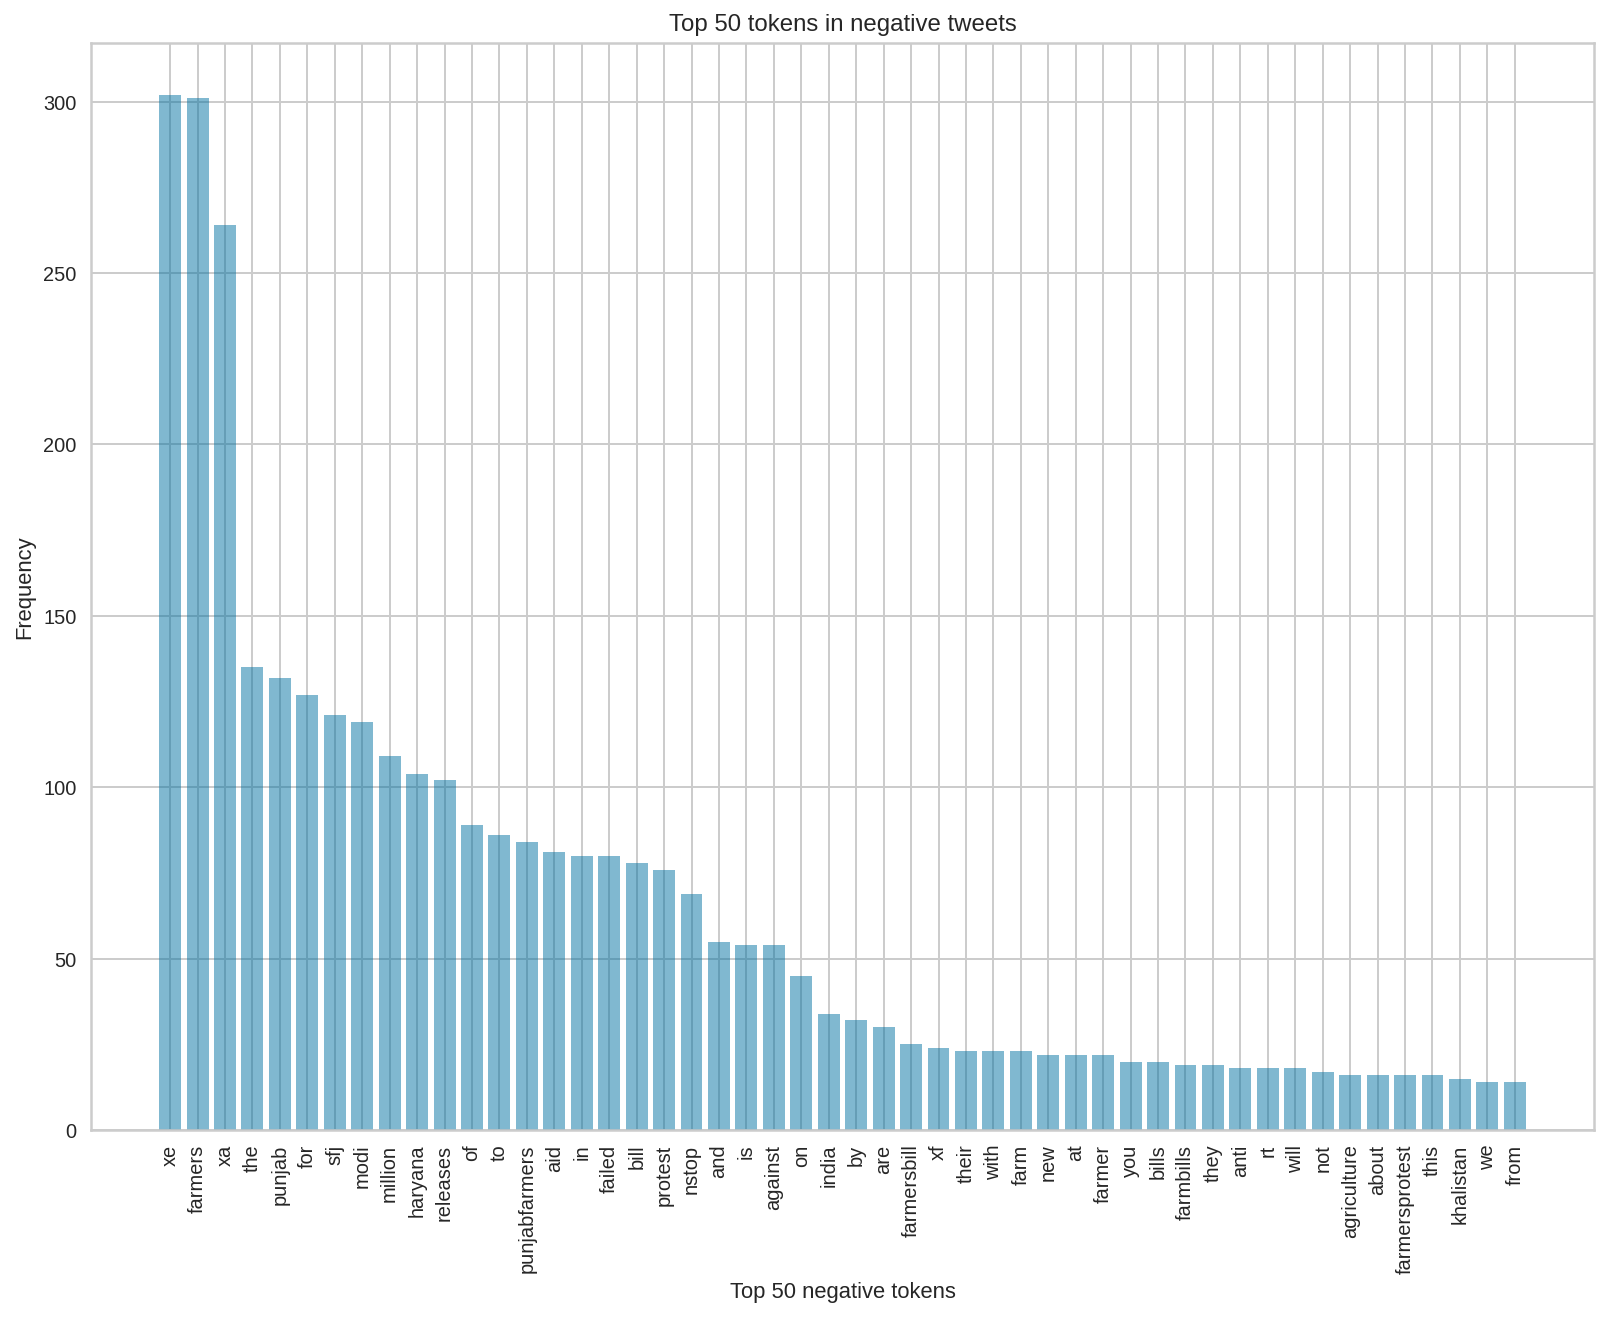

In [ ]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

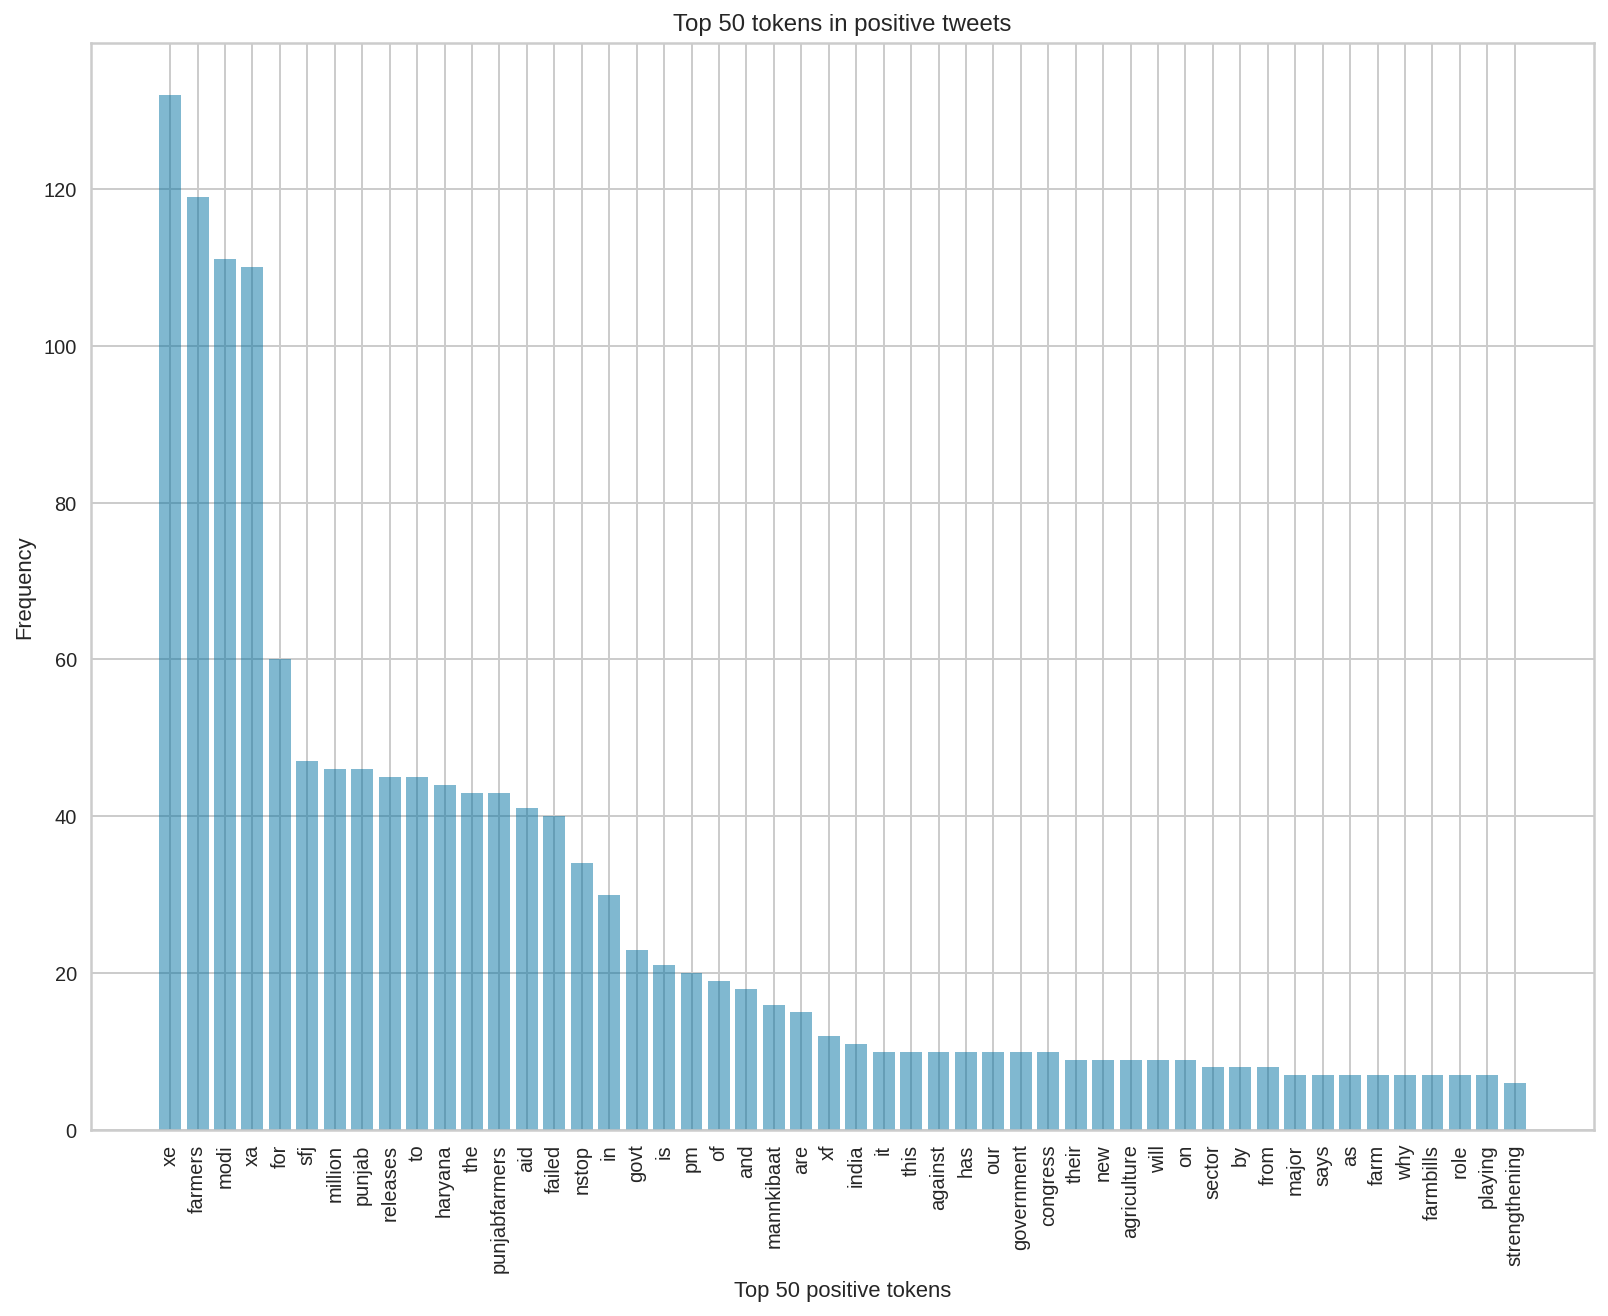

In [ ]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

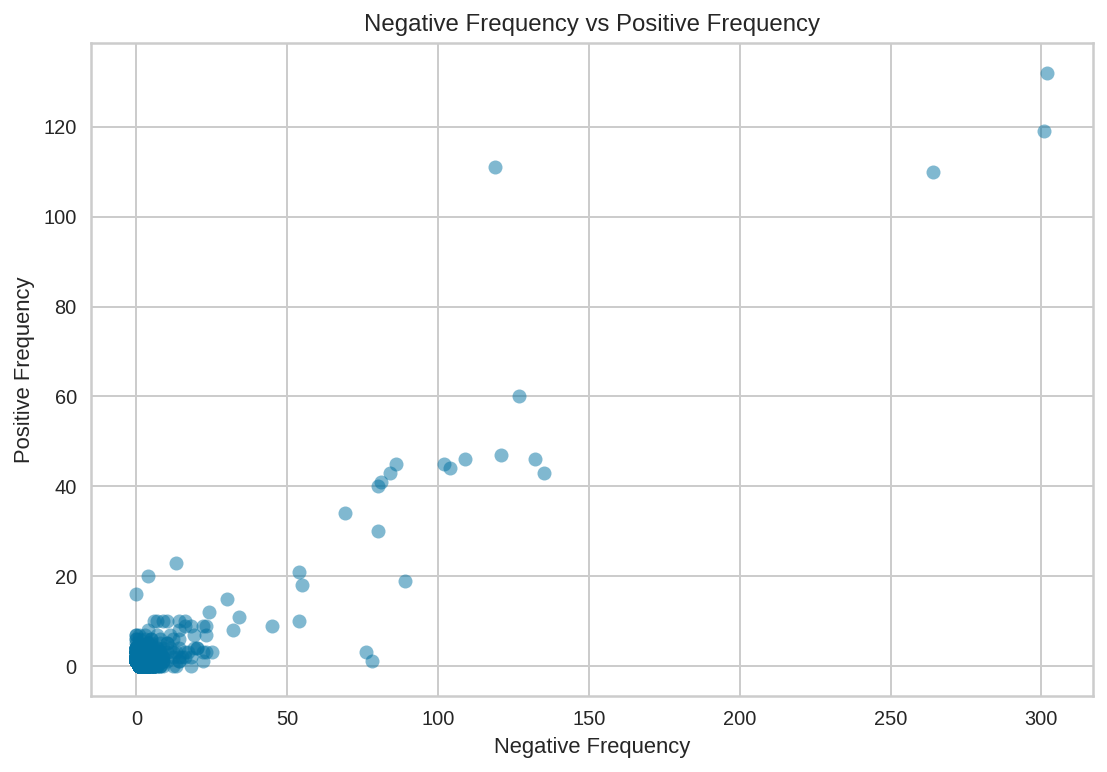

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import gensim

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 435
TEST size: 109


In [ ]:
documents = [_text.split() for _text in df_train.Tweets] 

In [ ]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

In [ ]:
w2v_model.build_vocab(documents)

In [ ]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 78


In [ ]:
w2v_model.train(documents, total_examples=len(documents), epochs=32)

(40880, 200928)

In [ ]:
w2v_model.most_similar("farm")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('laws', 0.9996976852416992),
 ('as', 0.9996799826622009),
 ('on', 0.9995858669281006),
 ('congress', 0.9995849132537842),
 ('who', 0.9993652701377869),
 ('about', 0.9993036389350891),
 ('protesting', 0.9992674589157104),
 ('was', 0.9992542266845703),
 ('india', 0.9992300271987915),
 ('new', 0.9992221593856812)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.Tweets)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 1352


In [ ]:
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.Tweets), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.Tweets), maxlen=300)

In [ ]:
labels = df_train.target.unique().tolist()
labels

[" in protest against\\xe2\\x80\\xa6 https://t.co/FMryumWVsd'",
 ' BJP #just trying to fool #Farmers ',
 '1',
 " #PYC ready for any responsibility: #BrinderDhillon\\xe2\\x80\\xa6 https://t.co/vYbOPsVteA'",
 " thousands of\\xe2\\x80\\xa6 https://t.co/TCFe2vEPg5'",
 'WHEN #MODI #GOVERNMENT IS SNATCHING #KISHAN INTEREST',
 ' #farmers from Dhurala village',
 '0',
 " Union Minister @nstomar has recently lau\\xe2\\x80\\xa6 https://t.co/3DvGGwbRXU'",
 ' chaired by Prof. M.S. Swaminathan',
 " THROWING OUT #OPPOSITION\\xe2\\x80\\xa6 https://t.co/cgm0blW2ks'",
 " for the first time after Independence our #farmers have got freedom in true sense\\xe2\\x80\\xa6 https://t.co/EfBMjbZ3PN'",
 ' I\\xe2\\x80\\x99ve had a dialogue with farmer organizations',
 'what a Country is',
 " these sectors have freed themselves from many shackles. Attempts were made to bust ma\\xe2\\x80\\xa6 https://t.co/BRDeIpqeJS'",
 "the ongoing #Farmers protest can prove disru\\xe2\\x80\\xa6 https://t.co/HGchpM1uUv'",
 " protes

In [ ]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())

y_train = y_train.reshape(-1,1)

print("y_train",y_train.shape)

y_train (435, 1)


In [ ]:
y_train[:10]

array([[55],
       [18],
       [91],
       [ 5],
       [91],
       [80],
       [91],
       [96],
       [91],
       [91]])

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(1352, 300)


In [ ]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

In [ ]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          405600    
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 566,101
Trainable params: 160,501
Non-trainable params: 405,600
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/10
13/13 [==============================] - 36s 886ms/step - loss: -84.8478 - accuracy: 0.0022 - val_loss: -554.0976 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 10s 785ms/step - loss: -659.4750 - accuracy: 0.0039 - val_loss: -919.2463 - val_accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 10s 793ms/step - loss: -982.8083 - accuracy: 0.0015 - val_loss: -1127.7219 - val_accuracy: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 10s 795ms/step - loss: -1178.5262 - accuracy: 0.0015 - val_loss: -1270.9398 - val_accuracy: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 10s 799ms/step - loss: -1295.5638 - accuracy: 0.0018 - val_loss: -1405.6659 - val_accuracy: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 11s 813ms/step - loss: -1452.2998 - accuracy: 3.6536e-04 - val_loss: -1526.7493 - val_accuracy: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 11s 811ms/step - los

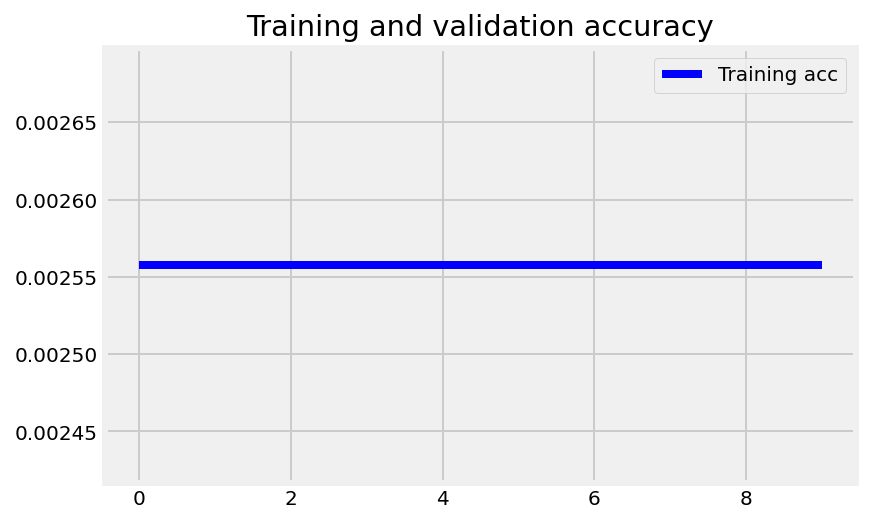

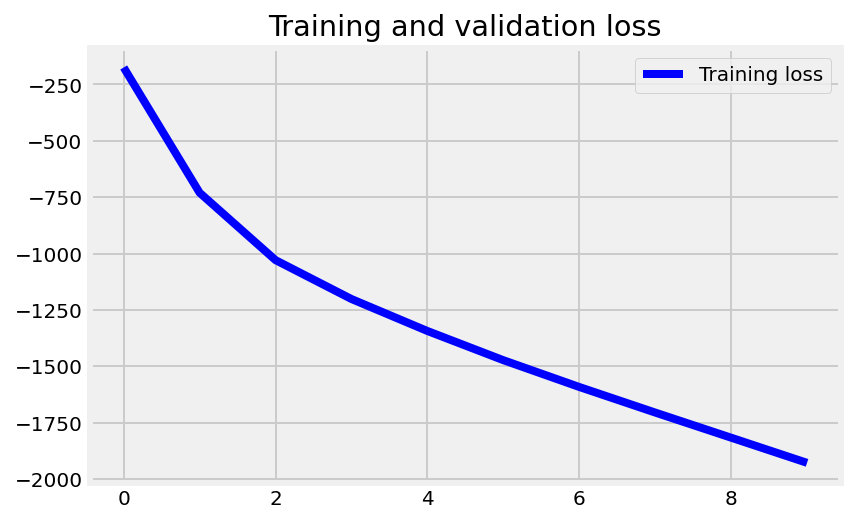

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=1)
X_train = train['Tweets'].values
X_test = test['Tweets'].values
y_train = train['target']
y_test = test['target']

In [ ]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
np.random.seed(1)

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="accuracy",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   17.9s finished


0.29357798165137616

In [ ]:
pipeline_svm.fit(X_train,y_train)
pipeline_svm.score(X_test,y_test)

0.29357798165137616

In [ ]:
grid_svm.best_score_

0.3218390804597701

In [ ]:
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred,average='macro')
    prec = precision_score(y, pred,average='macro')
    rec = recall_score(y, pred,average='macro')
    result = {'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [ ]:
report_results(grid_svm.best_estimator_, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'acc': 0.29357798165137616,
 'f1': 0.0695581014729951,
 'precision': 0.07628205128205129,
 'recall': 0.06640625}